In [ ]:
import pandas as pd
import numpy as np
import random

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
print(train_df.columns.values)

In [ ]:
train_df.head()

In [ ]:
train_df.info()

In [ ]:
train_df.describe().T

In [8]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index= False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index= False).mean().sort_values(by='Survived', ascending= False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


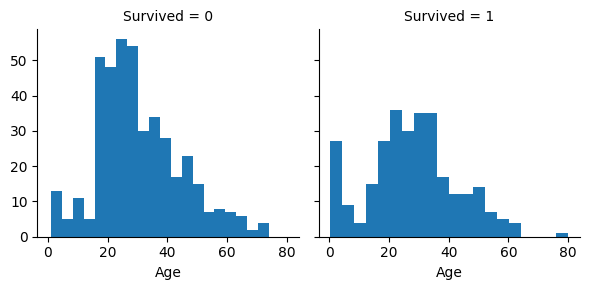

In [11]:
grafik1 = sns.FacetGrid(train_df, col='Survived')
grafik1.map(plt.hist, 'Age', bins=20)

c:\Users\enest\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


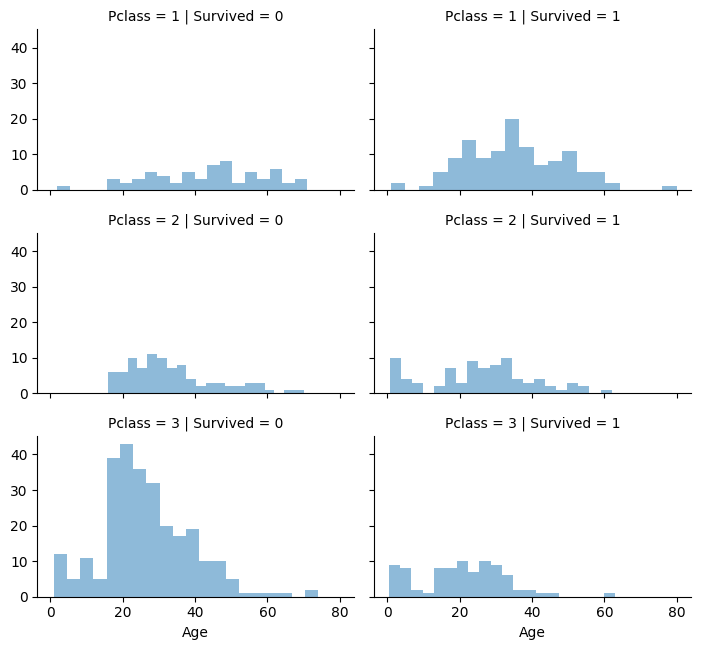

In [13]:
grafik2 = sns.FacetGrid(train_df, col='Survived', row= 'Pclass', size=2.2, aspect=1.6)
grafik2.map(plt.hist, 'Age', alpha = .5, bins=20)
grafik2.add_legend();

c:\Users\enest\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\enest\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\enest\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


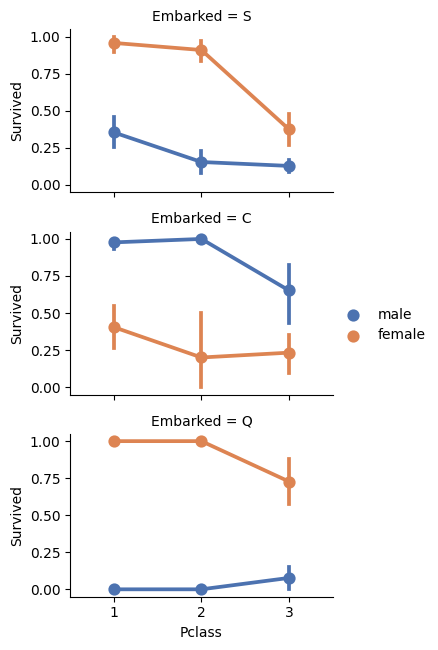

In [14]:
grafik3 = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grafik3.map(sns.pointplot, 'Pclass','Survived','Sex', palette = 'deep')
grafik3.add_legend()

c:\Users\enest\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\enest\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


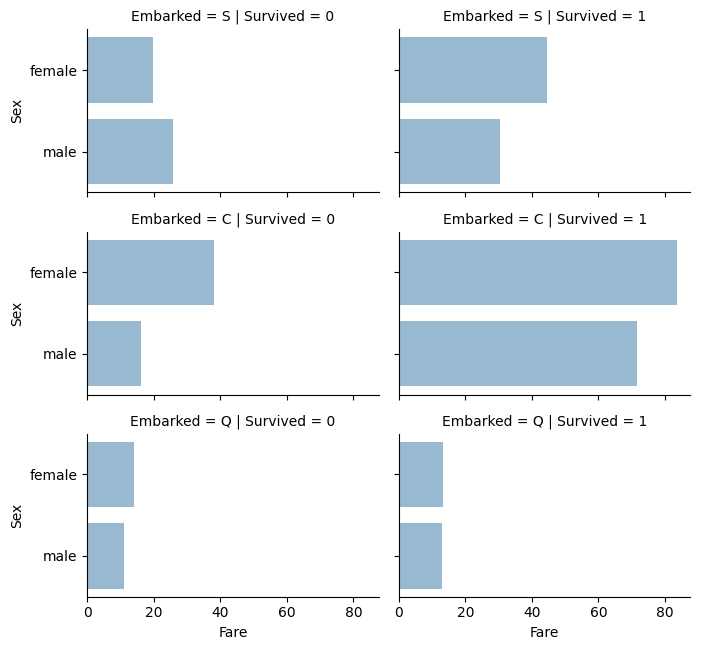

In [15]:
grafik4 = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grafik4.map(sns.barplot, 'Fare', 'Sex', alpha= .5, ci = None)
grafik4.add_legend()

In [16]:
print('Veri setinin ilk hali: ', train_df.shape, test_df.shape)
train_df = train_df.drop(['Ticket', 'Cabin', 'Fare'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'Fare'], axis=1)
print('Veri setinin son hali: ', train_df.shape, test_df.shape)


Veri setinin ilk hali:  (891, 12) (418, 11)
Veri setinin son hali:  (891, 9) (418, 8)


In [17]:
all_data = [train_df, test_df]

Ünvanların erkek ve kadın sayılarının gösterimi

In [18]:
for dataset in all_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [27]:
t_mapping = {'Miss':1, 'Mr':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in all_data:
    dataset['Title'] = dataset['Title'].map(t_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [28]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,3
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,3
4,0,3,male,35.0,0,0,S,2


In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
all_data = [train_df, test_df]
train_df.shape, test_df.shape

In [ ]:
s_mapping = {'male':0, 'famale':1}
train_df['Sex'] = train_df['Sex'].map(s_mapping).astype(int)
    